In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
DATA_DIR = "../data/cluster_0/"

In [8]:
# segment1
df1 = pd.read_pickle(DATA_DIR + 'cluster_origin_data_set-X0.2_Y0.18_Z0.01.pkl') #불러오기
# df1.to_csv(DATA_DIR + 'seg1.csv')

In [9]:
# segment2
df2 = pd.read_pickle(DATA_DIR + 'cluster_origin_data_set-X0.2_Y0.78_Z0.0.pkl') #불러오기
df2.to_csv(DATA_DIR + 'seg2.csv')

In [10]:
# segment3
df3 = pd.read_pickle(DATA_DIR + 'cluster_origin_data_set-X0.15_Y0.14_Z0.94.pkl') #불러오기
df3.to_csv(DATA_DIR + 'seg3.csv')

In [15]:
# segment2
df = df2.copy()

# 연령대를 정의합니다.
age_bins = [20, 30, 40, 50, 60, float('inf')]  # 20대, 30대, 40대, 50대, 60대 이상

# 연령대 레이블을 정의합니다.
age_labels = ['20', '30', '40', '50', '60']

# 'Age_Group' 열을 생성하여 연령대를 할당합니다.
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels, right=False)

# 결과를 출력합니다.
df.to_csv(DATA_DIR + 'seg2_age_bin.csv')

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
8847,820936533,Existing Customer,47,M,3,Graduate,Unknown,Less than $40K,Blue,43,...,3,2781.0,1950,831.0,0.980,9331,93,0.500,0.701,40
8942,711559008,Existing Customer,40,F,4,Post-Graduate,Single,$40K - $60K,Blue,28,...,2,11642.0,1501,10141.0,0.935,9137,92,0.586,0.129,40
8968,780114558,Existing Customer,50,M,1,High School,Married,Less than $40K,Blue,35,...,3,3968.0,2264,1704.0,1.098,12535,118,0.815,0.571,50
8993,714999483,Existing Customer,38,M,4,Uneducated,Unknown,$80K - $120K,Silver,36,...,2,34516.0,1132,33384.0,0.840,9389,106,0.797,0.033,30
9040,774012933,Existing Customer,47,F,3,College,Divorced,$40K - $60K,Blue,41,...,1,6443.0,2073,4370.0,0.800,9277,92,0.769,0.322,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170,40
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106,50
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151,50
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164,50


In [16]:
# segment1
df = df1.copy()

# 연령대를 정의합니다.
age_bins = [20, 30, 40, 50, 60, float('inf')]  # 20대, 30대, 40대, 50대, 60대 이상

# 연령대 레이블을 정의합니다.
age_labels = ['20', '30', '40', '50', '60']

# 'Age_Group' 열을 생성하여 연령대를 할당합니다.
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels, right=False)

# 결과를 출력합니다.
df.to_csv(DATA_DIR + 'seg1_age_bin.csv')

df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age_Group
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,40
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,40
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,50
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,40
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9661,717060858,Attrited Customer,31,M,0,Graduate,Married,Less than $40K,Blue,36,...,3,6911.0,2517,4394.0,0.934,8123,71,0.732,0.364,30
9714,713242383,Attrited Customer,39,M,2,Uneducated,Married,$120K +,Silver,19,...,2,34516.0,796,33720.0,0.841,7721,75,0.667,0.023,30
9768,753220383,Attrited Customer,29,M,0,Graduate,Single,$120K +,Blue,22,...,3,11722.0,0,11722.0,0.778,8302,78,0.902,0.000,20
9820,714082308,Attrited Customer,39,M,3,High School,Single,$80K - $120K,Blue,13,...,3,8656.0,0,8656.0,0.893,8056,89,0.935,0.000,30


In [17]:
# segment3
df = df3.copy()

# 연령대를 정의합니다.
age_bins = [20, 30, 40, 50, 60, float('inf')]  # 20대, 30대, 40대, 50대, 60대 이상

# 연령대 레이블을 정의합니다.
age_labels = ['20', '30', '40', '50', '60']

# 'Age_Group' 열을 생성하여 연령대를 할당합니다.
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, labels=age_labels, right=False)

# 결과를 출력합니다.
# df.to_csv(DATA_DIR + 'seg3_age_bin.csv')

# df
df3 = df.copy()

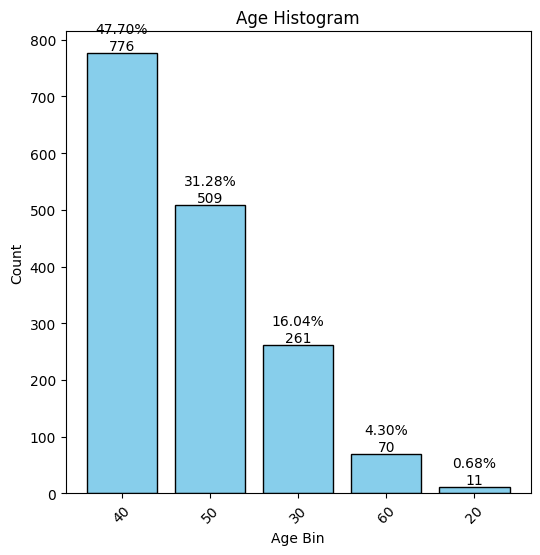

In [26]:
# 연령대별 개수와 비율을 계산합니다.
age_counts = df['Age_Group'].value_counts()
age_proportions = age_counts / age_counts.sum()

# 히스토그램을 그립니다.
plt.figure(figsize=(6, 6))
bars = plt.bar(age_counts.index, age_counts, color='skyblue', edgecolor='black')

# 개수와 비율을 표시합니다.
for bar, count, proportion in zip(bars, age_counts, age_proportions):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, count + 30, f'{proportion:.2%}', ha='center', va='bottom', fontsize=10)

# 히스토그램 제목 및 축 레이블 설정
plt.title('Age Histogram')
plt.xlabel('Age Bin')
plt.ylabel('Count')

# x축 레이블을 연령대로 설정
plt.xticks(rotation=45)

# 히스토그램 표시
plt.show()

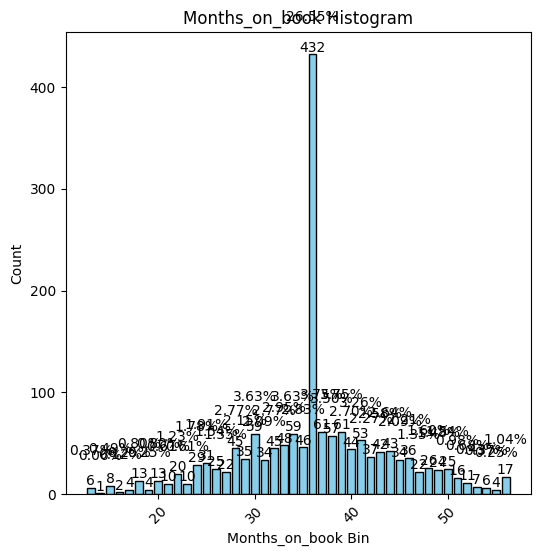

In [29]:
# 3번 데이터셋 거래기간별 개수와 비율을 계산합니다.
df = pd.read_csv(DATA_DIR + 'seg3_age_bin.csv')

# 연령대를 정의합니다.
age_bins = [24, 36, 48, 60, float('inf')]  # 20대, 30대, 40대, 50대, 60대 이상

# 연령대 레이블을 정의합니다.
age_labels = ['20', '30', '40', '50']

# 'Age_Group' 열을 생성하여 연령대를 할당합니다.
df['Months_on_book_group'] = pd.cut(df['Months_on_book'], bins=age_bins, labels=age_labels, right=False)

# 결과를 출력합니다.
df.to_csv(DATA_DIR + 'seg3_age_bin.csv')

# df
df3 = df.copy()

age_counts = df['Months_on_book'].value_counts()
age_proportions = age_counts / age_counts.sum()

# 히스토그램을 그립니다.
plt.figure(figsize=(6, 6))
bars = plt.bar(age_counts.index, age_counts, color='skyblue', edgecolor='black')

# 개수와 비율을 표시합니다.
for bar, count, proportion in zip(bars, age_counts, age_proportions):
    plt.text(bar.get_x() + bar.get_width() / 2, count, str(count), ha='center', va='bottom')
    plt.text(bar.get_x() + bar.get_width() / 2, count + 30, f'{proportion:.2%}', ha='center', va='bottom', fontsize=10)

# 히스토그램 제목 및 축 레이블 설정
plt.title('Months_on_book Histogram')
plt.xlabel('Months_on_book Bin')
plt.ylabel('Count')

# x축 레이블을 연령대로 설정
plt.xticks(rotation=45)

# 히스토그램 표시
plt.show()